In [3]:
import  pandas as pd
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier




In [4]:
df = pd.read_csv('/content/result_data.csv', delimiter = ';')
df

,titles,target
0,Родственник раскрыл настоящую фамилию Пугачёво...,1
1,Предсказания Матроны Московской на 2024-й год:...,1
2,"Пророчество схимонахини Нины об антихристе, ми...",1
3,«Думал об этом»: что Путин сказал о своем прее...,1
4,Путин поручил уведомить россиян об изменениях ...,1
...,...,...
3193,Путин поручил передать Республике Крым все акц...,0
3194,ЕК изучит просьбу Венгрии по нарушению Болгари...,0
3195,"Глава ""Россетей"" доложил Путину о достижении ц...",0
3196,"Платформа ""Мой экспорт"" научит устанавливать д...",0


<Axes: xlabel='target', ylabel='count'>

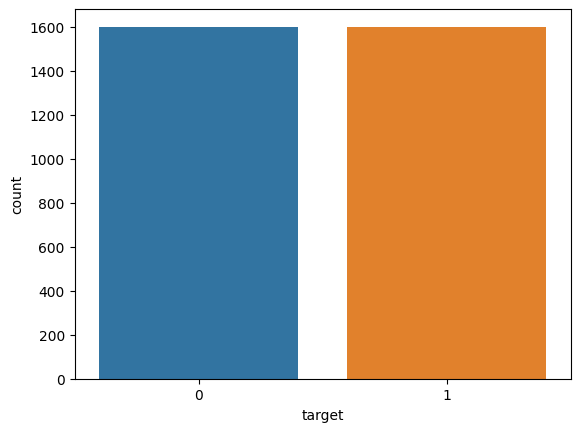

In [5]:
sns.countplot(data = df, x = 'target')

In [6]:
from nltk.corpus import stopwords #импорт набора стоп-слов
!pip install pymorphy2
import pymorphy2
import re #регулярные выражения
from string import punctuation #сборник символов пунктуации


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 67.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5f505e7b3ddbe7050ea0315bfdb098c6b1b345030f69ffb43622dcdd8c97d3c9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [9]:
# import nltk
# nltk.download('stopwords')
stopWords = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [10]:
from nltk.tokenize import word_tokenize, ToktokTokenizer
def normalize(content):
    review = re.sub('(?i)[^А-ЯЁA-Z]',' ',content)
    review = review.lower()
    review = review.split()

    review = ' '.join(review)

    return review




In [11]:
df['title_normalize'] = df['titles'].apply(normalize)
df


,titles,target,title_normalize
0,Родственник раскрыл настоящую фамилию Пугачёво...,1,родственник раскрыл настоящую фамилию пугачёво...
1,Предсказания Матроны Московской на 2024-й год:...,1,предсказания матроны московской на й год когда...
2,"Пророчество схимонахини Нины об антихристе, ми...",1,пророчество схимонахини нины об антихристе мир...
3,«Думал об этом»: что Путин сказал о своем прее...,1,думал об этом что путин сказал о своем преемнике
4,Путин поручил уведомить россиян об изменениях ...,1,путин поручил уведомить россиян об изменениях ...
...,...,...,...
3193,Путин поручил передать Республике Крым все акц...,0,путин поручил передать республике крым все акц...
3194,ЕК изучит просьбу Венгрии по нарушению Болгари...,0,ек изучит просьбу венгрии по нарушению болгари...
3195,"Глава ""Россетей"" доложил Путину о достижении ц...",0,глава россетей доложил путину о достижении цел...
3196,"Платформа ""Мой экспорт"" научит устанавливать д...",0,платформа мой экспорт научит устанавливать дел...


In [12]:
y = df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['title_normalize'],
                                               df['target'],
                                               train_size=0.67,
                                               random_state=42,
                                               stratify = y)
print(f"Классы в x_train:\n{x_train}")
print(f"Классы в x_test:\n{x_test}")

Классы в x_train:
439     пугачева впервые за долгое время вышла на связ...
1131    что стряслось в школе москвы весть о чп облете...
3188    цб предложил установить правила онлайн продаж ...
2212    путин вопрос о системе льгот специалистам косм...
2910    небензя рассказал как из за сша сб оон не треб...
                              ...                        
3141    акции яндекса растут на сообщениях сми о плана...
1776    не скроете в сети пришли в ярость из за фото з...
1441    эти российские люксовые седаны теперь собирают...
1395    агата жги вот что выложила оставшаяся без мужа...
2547    звезды сериала друзья отреагировали на смерть ...
Name: title_normalize, Length: 2142, dtype: object
Классы в x_test:
2607    умер актер сергей гладков известный по ролям в...
3073    цб продлит программу поддержки кредитования ма...
2199    власти поддержат проект ядерного буксира заяви...
1370    удар по украинскому аэродрому ноября вот что т...
398     указ подписан пенсионеров которые на

In [ ]:
y

In [ ]:
# tfidf_vectorizer=TfidfVectorizer(stop_words=stopWords, max_df=0.7)
# tfidf_vectorizer

TfidfVectorizer(max_df=0.7,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [ ]:
# tfidf_train=tfidf_vectorizer.fit_transform(x_train)
# tfidf_test=tfidf_vectorizer.transform(x_test)
# tfidf_train


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(x_train)
testing_data = count_vector.transform(x_test)
training_data

<2142x7616 sparse matrix of type '<class 'numpy.int64'>'
	with 18107 stored elements in Compressed Sparse Row format>

In [14]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(training_data, y_train)

RandomForestClassifier()

In [15]:
x_test

2607    умер актер сергей гладков известный по ролям в...
3073    цб продлит программу поддержки кредитования ма...
2199    власти поддержат проект ядерного буксира заяви...
1370    удар по украинскому аэродрому ноября вот что т...
398     указ подписан пенсионеров которые накопили ста...
                              ...                        
317     суперполезный суп из ссср который незаслуженно...
1759    литва введет налог на дождь из за расходов на ...
899     секретное завещание ленина откроют в году что ...
2675    суд рассмотрит протокол на максакову за отсутс...
619     доктор мясников призывает гипертоников пить кр...
Name: title_normalize, Length: 1056, dtype: object

In [17]:
predictions = random_forest.predict(testing_data)
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

'Accuracy score: ', format(accuracy_score(y_test, predictions))

('Accuracy score: ', '0.8380681818181818')

In [19]:
'Precision score: ', format(precision_score(y_test, predictions))


('Precision score: ', '0.9084668192219679')

In [20]:
'Recall score: ', format(recall_score(y_test, predictions))

('Recall score: ', '0.7518939393939394')

In [21]:
from sklearn.metrics import fbeta_score
'F-beta_score: ', format(fbeta_score(y_test, predictions, beta=1))

('F-beta_score: ', '0.82279792746114')

In [22]:
new_test = ['Эти 3 знака Зодиака, постоянно жалуются на жизнь: общаться с ними невозможно']
new_testing_data = count_vector.transform(new_test)
new_predictions = random_forest.predict(new_testing_data)
new_predictions

array([1])

LookupError: ignored